# Ejemplo de regresión logisitica

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [14]:
iris = datasets.load_iris()

In [15]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
X = iris['data'][:, 3:]
X_c = np.c_[np.ones((len(iris['target']), 1)), X]

In [17]:
#Detect iris virginica
y = (iris['target'] == 2).astype(int).reshape(len(iris['target']), 1)
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

## Apliación del descenso de gradiente

In [18]:
def sigmoid(z):
    return 1 / (1 + np. exp(- z))

In [19]:
eta = 0.5
n_iterations = 100000
m = len(y)

In [20]:
theta = np.random.randn(2, 1)
theta

array([[0.87972604],
       [1.11247918]])

In [21]:
for i in range(n_iterations):
    gradients = (1/m) * (X_c.T @ (sigmoid(X_c @ theta) - y))
    theta = theta - gradients

theta

array([[-21.12564008],
       [ 12.94750723]])

1.6336336336336337


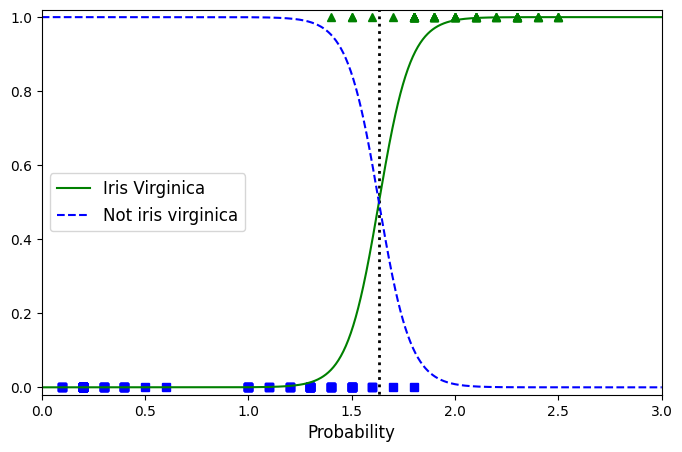

In [22]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
X_new_c = np.c_[np.ones((1000, 1)), X_new]
y_proba = sigmoid(theta.T @ X_new_c.T)

decision_Boundary = X_new[y_proba.reshape(-1, 1) >= 0.5][0]

plt.figure(figsize = (8, 5))
plt.plot(X[y == 0], y[y == 0], 'bs', markersize = 6)
plt.plot(X[y == 1], y[y == 1], 'g^', markersize = 6)
plt.plot([decision_Boundary, decision_Boundary], [-1, 2], 'k:', linewidth = 2)
print(decision_Boundary)

plt.plot(X_new, y_proba.T, 'g-', label = "Iris Virginica")
plt.plot(X_new, 1 - y_proba.T, 'b--', label = "Not iris virginica")
plt.xlabel('X', fontsize = 12)
plt.xlabel('Probability', fontsize = 12)
plt.legend(loc = 'center left', fontsize = 12)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

## Aplicando la libreria sklearn la clase LogisticRegression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression(C = 10**10)
model.fit(X, y.ravel())

LogisticRegression(C=10000000000)

[1.63363363]


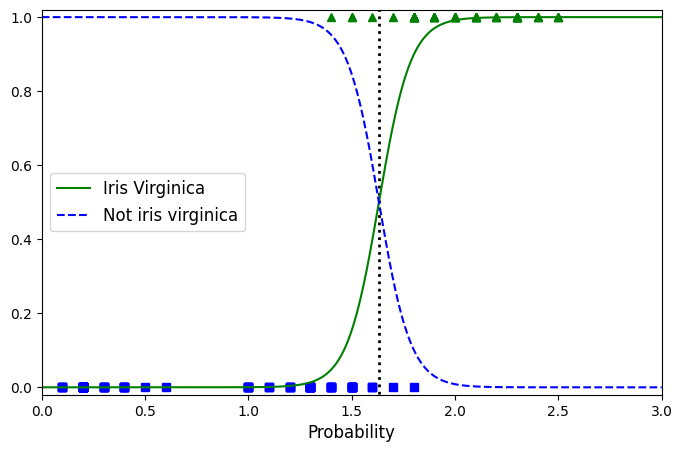

In [25]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = model.predict_proba(X_new)

decision_Boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize = (8, 5))
plt.plot(X[y == 0], y[y == 0], 'bs', markersize = 6)
plt.plot(X[y == 1], y[y == 1], 'g^', markersize = 6)
plt.plot([decision_Boundary, decision_Boundary], [-1, 2], 'k:', linewidth = 2)
print(decision_Boundary)

plt.plot(X_new, y_proba[:, 1], 'g-', label = "Iris Virginica")
plt.plot(X_new, 1 - y_proba[:, 1], 'b--', label = "Not iris virginica")
plt.xlabel('X', fontsize = 12)
plt.xlabel('Probability', fontsize = 12)
plt.legend(loc = 'center left', fontsize = 12)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [26]:
y_proba

array([[9.99999999e-01, 6.68990990e-10],
       [9.99999999e-01, 6.95514100e-10],
       [9.99999999e-01, 7.23088756e-10],
       ...,
       [2.18558172e-08, 9.99999978e-01],
       [2.10223556e-08, 9.99999979e-01],
       [2.02206778e-08, 9.99999980e-01]])

In [27]:
X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(int)

In [37]:
model = LogisticRegression(C=10**10)
model.fit(X, y)

LogisticRegression(C=10000000000)

`model.intercept_` contiene $\theta_0$

In [38]:
model.intercept_

array([-45.27248302])

`model.coef_` contiene $\theta_1$ en adelante

In [36]:
model.coef_

array([[ 5.75452052, 10.44681114]])

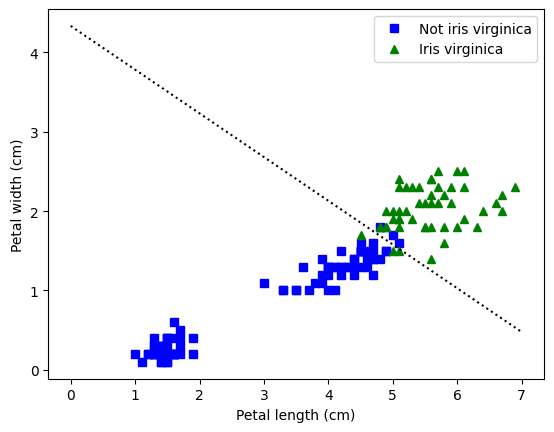

In [44]:
y_proba = model.predict_proba(X)

left_right = np.array([0, 7])
boundary = -(model.intercept_[0] + model.coef_[0][0] * left_right) / model.coef_[0][1]

plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label = "Not iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "g^", label = "Iris virginica")

plt.plot(left_right, boundary, "k:")

plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.legend()

plt.show()

Incluso funciona para mútiples clases (3, en este ejemplo):

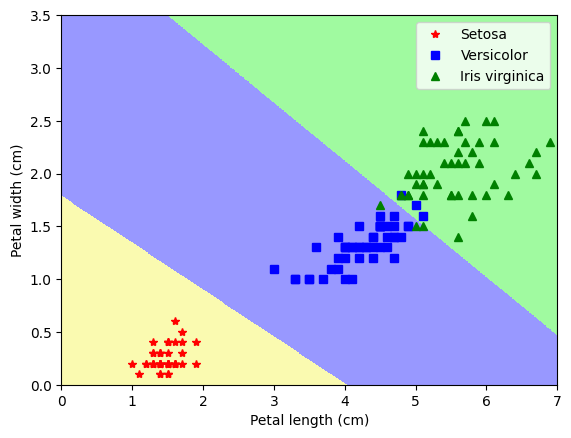

In [55]:
X = iris["data"][:, (2, 3)]
# y = (iris["target"] == 2).astype(int)
y = iris["target"]


model = LogisticRegression(C=10**10)
model.fit(X, y)

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 500).reshape(-1, 1)) 

y_proba = model.predict_proba(X)

X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = model.predict(X_new)
zz = y_predict.reshape(x0.shape)

left_right = np.array([0, 7])
boundary = -(model.intercept_[0] + model.coef_[0][0] * left_right) / model.coef_[0][1]

from matplotlib.colors import ListedColormap

custom_map = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])
plt.contourf(x0, x1, zz, cmap=custom_map)

# plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label = "Not iris virginica")
# plt.plot(X[y == 1, 0], X[y == 1, 1], "g^", label = "Iris virginica")
plt.plot(X[y == 0, 0], X[y == 0, 1], "r*", label = "Setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label = "Versicolor")
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label = "Iris virginica")


# plt.plot(left_right, boundary, "k:")

plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.legend()
plt.axis([0, 7, 0, 3.5])

plt.show()